In [ ]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-19 03:14:31,995 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:14:31,996 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:14:31,997 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:14:32,011 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-19 03:14:32,012 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-19 03:14:32,024 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-19 03:14:32,302 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-19 03:14:32,336 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:14:32,337 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:14:32,339 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:14:32,343 - settings - Setting enable_python_native_blobs to True


Sleeping 175 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-19 03:14:32,619 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 5497


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,1,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8309
864691134242673681,0,0.25,30.00,0,0,1,=BLOB=,10252,20204,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9755
864691134252908410,0,0.25,30.00,0,0,1,=BLOB=,10910,22764,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2558
864691134316523453,0,0.25,30.00,0,0,1,=BLOB=,10031,22403,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5114
864691134384033872,0,0.25,30.00,0,0,1,=BLOB=,10015,20509,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8075
864691134391593458,0,0.25,30.00,0,0,1,=BLOB=,11947,25033,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7341
864691134409056935,0,0.25,30.00,0,0,1,=BLOB=,10770,22630,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9198
864691134428609977,0,0.25,30.00,0,0,1,=BLOB=,13062,28555,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.3236
864691134441691943,0,0.25,30.00,0,0,1,=BLOB=,10681,23432,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9167
864691134484023255,0,0.25,30.00,0,0,1,=BLOB=,21063,46992,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2306


In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition() & minnie.MultiSomaProofread2.proj()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,bd1627d7d13c83b53d92e08149722d3e,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,32396,53500,2021-01-18 21:14:16


INFO - 2021-01-19 03:14:32,800 - autopopulate - Found 49 keys to populate
INFO - 2021-01-19 03:14:32,809 - connection - Transaction started
INFO - 2021-01-19 03:14:32,811 - autopopulate - Populating: {'segment_id': 864691135012471798, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135012471798-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0 1]
multi_touch_limbs = [0 1]


 -------- Working on limb 0------------
Starting combinations to process = [[61 64]
 [61 66]
 [64 66]]


---- working on disconnecting 61 and 64
---- This disconnects S1_0 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [61, 56, 55, 53, 52, 54, 63, 64]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0 41 42 44 46 52 53 54 55 56 60 62 63]
Short segments to combine = [52 53]


-------- Removing Segments -------------
curr_short_seg_revised = 52
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[571904. 622208. 955486.]
 [571940. 622670. 955726.]]
new_stitch_poi

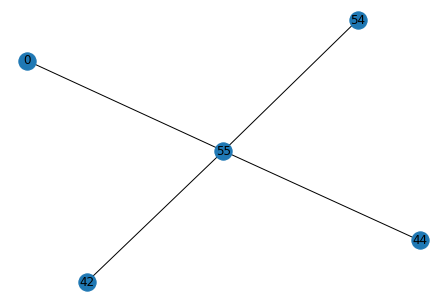

match_branches = [[44, 55]]
edges_to_delete (resolve crossover) = [[0, 42], [0, 44], [0, 54], [0, 55], [42, 44], [42, 54], [42, 55], [44, 54], [54, 55]]
edges_to_create (resolve crossover) = [[44, 55]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 42], [0, 44], [0, 54], [0, 55], [42, 44], [42, 54], [42, 55], [44, 54], [54, 55]]
edges_to_create = [[44, 55]]
Number of connected components = 6
Comp 0 = {64, 10, 46, 17, 50, 18, 54, 57, 58, 62, 63}
Comp 1 = {0}
Comp 2 = {42}
Comp 3 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 51, 55, 56, 59, 60, 61, 65, 66}
Comp 4 = {52}
Comp 5 = {53}
curr_limb_copy.deleted_edges = [[0, 42], [0, 44], [0, 54], [0, 55], [42, 44], [42, 54], [42, 55], [44, 54], [54, 55]]
curr_limb_copy.created_edges = [[44, 55]]
After get best cut: cut_edges = [[0, 42], [0, 44], [0, 54], [0, 55], [42, 44], [42, 54

  Edge: [61 60]: curr_angle = 29.38
  Edge: [60 49]: curr_angle = 51.17
  Edge: [49 47]: curr_angle = 26.61
  Edge: [47 48]: curr_angle = 114.17
  Edge: [48 59]: curr_angle = 18.04
  Edge: [59 66]: curr_angle = 19.69

Total time for doubling_back = 0.736783504486084
There were 1 edges that passed doubling back threshold of 100
Winning edge [47 48] had a doubling back of 114.16808346690144
***inside resolve crossover!!!!****
coordinate_branches = [23, 47, 48]
23 = red
47 = aqua
48 = purple
Angle between 23 and 47 = 56.1 
Angle between 23 and 48 = 9.9 
Angle between 47 and 48 = 133.71 
Final Matches = [[23, 48]]
matched_branches_revised = [[23, 48]]
Original graph


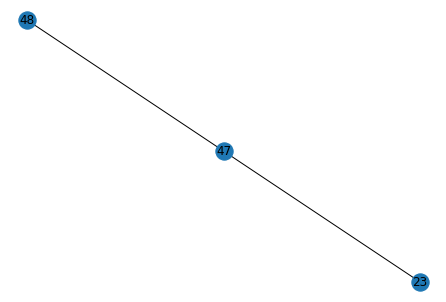

match_branches = [[23, 48]]
edges_to_delete (resolve crossover) = [[23, 47], [47, 48]]
edges_to_create (resolve crossover) = [[23, 48]]
edges_to_delete (cut_limb_network) = [array([23, 47]), array([47, 48])]
edges_to_create = [[23, 48]]
Number of connected components = 7
Comp 0 = {64, 10, 46, 17, 50, 18, 54, 57, 58, 62, 63}
Comp 1 = {0}
Comp 2 = {42}
Comp 3 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 45, 47, 49, 51, 55, 56, 60, 61}
Comp 4 = {65, 66, 40, 48, 23, 59}
Comp 5 = {52}
Comp 6 = {53}
curr_limb_copy.deleted_edges = [[0, 42], [0, 44], [0, 54], [0, 55], [42, 44], [42, 54], [42, 55], [44, 54], [54, 55], array([23, 47]), array([47, 48])]
curr_limb_copy.created_edges = [[44, 55], [23, 48]]
After get best cut: cut_edges = [array([23, 47]), array([47, 48])], added_edges = [[23, 48]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs

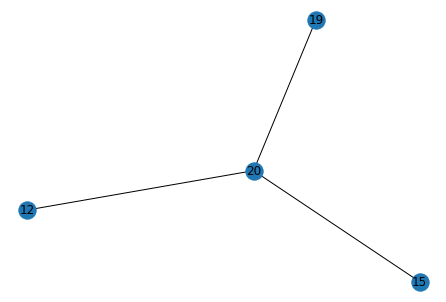

match_branches = [[12, 20], [15, 19]]
edges_to_delete (resolve crossover) = [[12, 15], [12, 19], [15, 20], [19, 20]]
edges_to_create (resolve crossover) = [[12, 20], [15, 19]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 28 because skeletal distance was 767.7967682704818 and threshold was 2500
skip_nodes = [28]
edges_to_delete (cut_limb_network) = [[12, 15], [12, 19], [15, 20], [19, 20]]
edges_to_create = [[12, 20], [15, 19]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 1 = {0, 4, 5, 12, 20, 23, 24, 27}
curr_limb_copy.deleted_edges = [[12, 15], [12, 19], [15, 20], [19, 20]]
curr_limb_copy.created_edges = [[12, 20], [15, 19]]
After get best cut: cut_edges = [[12, 15], [12, 19], [15, 20], [19,

  Edge: [25 11]: curr_angle = 47.32
  Edge: [11  2]: curr_angle = 12.79
  Edge: [2 3]: curr_angle = 109.13
  Edge: [ 3 17]: curr_angle = 34.02
  Edge: [17 30]: curr_angle = 54.37
  Edge: [30 29]: curr_angle = 38.49

Total time for doubling_back = 0.523503303527832
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 3] had a doubling back of 109.13275893657796
***inside resolve crossover!!!!****
coordinate_branches = [1, 2, 3]
1 = red
2 = aqua
3 = purple
Angle between 1 and 2 = 14.61 
Angle between 1 and 3 = 79.29 
Angle between 2 and 3 = 96.9 
Final Matches = [[1, 2]]
matched_branches_revised = [[1, 2]]
Original graph


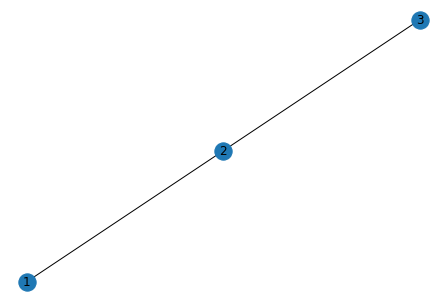

match_branches = [[1, 2]]
edges_to_delete (resolve crossover) = [[1, 3], [2, 3]]
edges_to_create (resolve crossover) = [[1, 2]]
edges_to_delete (cut_limb_network) = [array([1, 3]), array([2, 3])]
edges_to_create = [[1, 2]]
Number of connected components = 3
Comp 0 = {3, 6, 15, 17, 19, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 1 = {1, 2, 7, 8, 9, 10, 11, 13, 14, 16, 18, 21, 22, 25, 26, 28}
Comp 2 = {0, 4, 5, 12, 20, 23, 24, 27}
curr_limb_copy.deleted_edges = [[12, 15], [12, 19], [15, 20], [19, 20], array([1, 3]), array([2, 3])]
curr_limb_copy.created_edges = [[12, 20], [15, 19], [1, 2]]
After get best cut: cut_edges = [array([1, 3]), array([2, 3])], added_edges = [[1, 2]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECT

  Edge: [3 2]: curr_angle = 11.75
  Edge: [2 1]: curr_angle = 156.8
  Edge: [1 5]: curr_angle = 56.75

Total time for doubling_back = 0.1869204044342041
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 1] had a doubling back of 156.80124880728076
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 2]
0 = red
1 = aqua
2 = purple
Angle between 0 and 1 = 10.59 
Angle between 0 and 2 = 52.5 
Angle between 1 and 2 = 129.25 
Final Matches = [[0, 1]]
matched_branches_revised = [[0, 1]]
Original graph


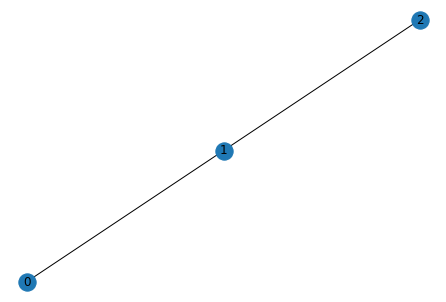

match_branches = [[0, 1]]
edges_to_delete (resolve crossover) = [[0, 2], [1, 2]]
edges_to_create (resolve crossover) = [[0, 1]]
edges_to_delete (cut_limb_network) = [array([0, 2]), array([1, 2])]
edges_to_create = [[0, 1]]
Number of connected components = 2
Comp 0 = {2, 3, 4}
Comp 1 = {0, 1, 5, 6}
curr_limb_copy.deleted_edges = [array([0, 2]), array([1, 2])]
curr_limb_copy.created_edges = [[0, 1]]
After get best cut: cut_edges = [array([0, 2]), array([1, 2])], added_edges = [[0, 1]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([2, 3, 4]), array([0, 1, 5, 6])]


 ------ Total time for Splitting 864691135274155493 = 245.90647149085999 ------


----- Working on Neuron 864691135462292893-------
Decompressing Neu

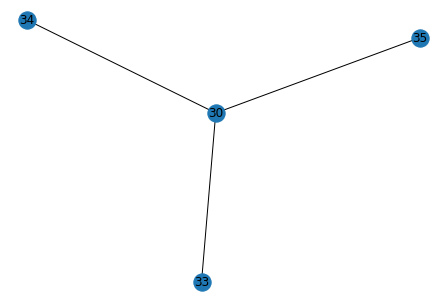

match_branches = [[30, 35]]
edges_to_delete (resolve crossover) = [[30, 33], [30, 34], [33, 34], [33, 35], [34, 35]]
edges_to_create (resolve crossover) = [[30, 35]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[30, 33], [30, 34], [33, 34], [33, 35], [34, 35]]
edges_to_create = [[30, 35]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {32, 33, 36}
Comp 2 = {34}
curr_limb_copy.deleted_edges = [[30, 33], [30, 34], [33, 34], [33, 35], [34, 35]]
curr_limb_copy.created_edges = [[30, 35]]
After get best cut: cut_edges = [[30, 33], [30, 34], [33, 34], [33, 35], [34, 35]], added_edges = [[30, 

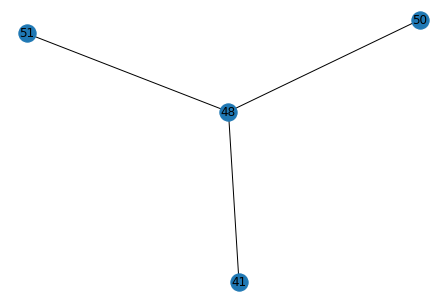

match_branches = [[48, 50], [41, 51]]
edges_to_delete (resolve crossover) = [[41, 48], [41, 50], [48, 51], [50, 51]]
edges_to_create (resolve crossover) = [[48, 50], [41, 51]]
curr_limb.deleted_edges 5 =[[30, 33], [30, 34], [33, 34], [33, 35], [34, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 48], [41, 50], [48, 51], [50, 51]]
edges_to_create = [[48, 50], [41, 51]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {41, 51}
Comp 2 = {32, 33, 36}
Comp 3 = {34}
curr_limb_copy.deleted_edges = [[30, 33], [30, 34], [33, 34], [33, 35], [34, 35], [41, 48], [41, 50], [48, 51], [50, 51]]
curr_limb_copy.created_edges = [[30, 3

  Edge: [3 4]: curr_angle = 29.82
  Edge: [4 6]: curr_angle = 20.46
  Edge: [6 7]: curr_angle = 21.44
  Edge: [7 8]: curr_angle = 40.1
  Edge: [ 8 10]: curr_angle = 23.16
  Edge: [10 17]: curr_angle = 5.03
  Edge: [17 22]: curr_angle = 21.45
  Edge: [22 30]: curr_angle = 36.67
  Edge: [30 35]: curr_angle = 34.09
  Edge: [35 39]: curr_angle = 28.38
  Edge: [39 48]: curr_angle = 35.45
  Edge: [48 50]: curr_angle = 13.94
  Edge: [50 52]: curr_angle = 20.01
  Edge: [52 47]: curr_angle = 24.23
  Edge: [47 46]: curr_angle = 31.97
  Edge: [46 53]: curr_angle = 21.22

Total time for doubling_back = 1.2943248748779297

Attempting the width jump check (attempting from both sides)
  Edge: [3 4]: jump = 380.94
Adding error edge [3 4] because width jump was 380.9437456850369
  Edge: [4 6]: jump = 23.78
  Edge: [6 7]: jump = 168.03
  Edge: [7 8]: jump = -69.21
  Edge: [ 8 10]: jump = -200.49
  Edge: [10 17]: jump = -52.58
  Edge: [17 22]: jump = -197.76
  Edge: [22 30]: jump = 70.06
  Edge: [30 35]:

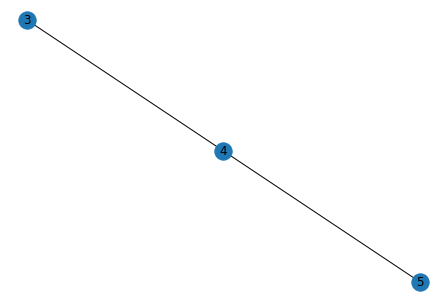

match_branches = [[3, 4]]
edges_to_delete (resolve crossover) = [[3, 5], [4, 5]]
edges_to_create (resolve crossover) = [[3, 4]]
Rejecting creating edge [3, 4] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([3, 4]), array([3, 5]), array([4, 5])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {41, 51}
Comp 2 = {32, 33, 36}
Comp 3 = {34}
Comp 4 = {3}
Comp 5 = {13, 12, 5}
curr_limb_copy.deleted_edges = [[30, 33], [30, 34], [33, 34], [33, 35], [34, 35], [41, 48], [41, 50], [48, 51], [50, 51], array([3, 4]), array([3, 5]), array([4, 5])]
curr_limb_copy.created_edges = [[30, 35],

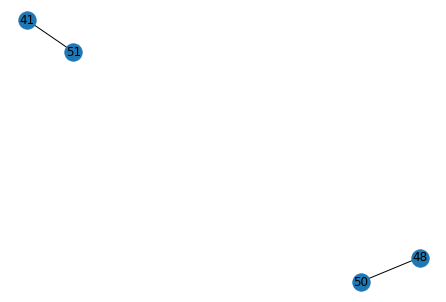

match_branches = [[48, 50], [41, 51]]
edges_to_delete (resolve crossover) = [[41, 48], [41, 50], [48, 51], [50, 51]]
edges_to_create (resolve crossover) = [[48, 50], [41, 51]]
curr_limb.deleted_edges 5 =[[30, 33], [30, 34], [33, 34], [33, 35], [34, 35], [41, 48], [41, 50], [48, 51], [50, 51], array([3, 4]), array([3, 5]), array([4, 5])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 48], [41, 50], [48, 51], [50, 51]]
edges_to_create = [[48, 50], [41, 51]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {41, 51}
Comp 2 = {32, 33, 36}
Comp 3 = {34}
Comp 4 = {3}
Comp 5 = {13, 12, 5}
Comp 6 = {73}
curr_limb_copy.deleted_edges = [[30, 33], [30

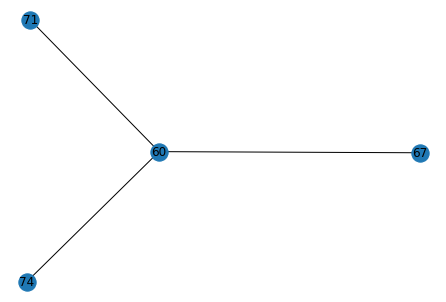

match_branches = [[71, 74]]
edges_to_delete (resolve crossover) = [[60, 67], [60, 71], [60, 74], [67, 71], [67, 74]]
edges_to_create (resolve crossover) = [[71, 74]]
curr_limb.deleted_edges 5 =[[30, 33], [30, 34], [33, 34], [33, 35], [34, 35], [41, 48], [41, 50], [48, 51], [50, 51], array([3, 4]), array([3, 5]), array([4, 5]), [41, 48], [41, 50], [48, 51], [50, 51]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[60, 67], [60, 71], [60, 74], [67, 71], [67, 74]]
edges_to_create = [[71, 74]]
Number of connected components = 9
Comp 0 = {40, 56, 59, 62, 63, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61}
Comp 2 = {64, 65, 67}
Comp 3 = {41, 51}
Comp 4 = {32, 33, 36}
Comp 5 = {34}
Comp 6 = {3}
Comp 7 = {13, 12, 5}
Comp 8 = 

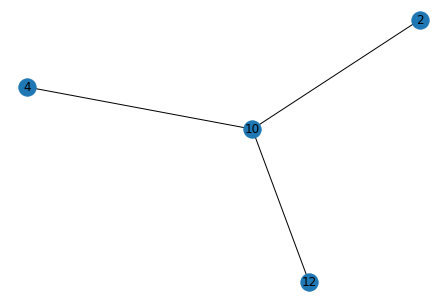

match_branches = [[10, 12]]
edges_to_delete (resolve crossover) = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
edges_to_create (resolve crossover) = [[10, 12]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 66 because skeletal distance was 602.9728562456542 and threshold was 2500
skip_nodes = [66]
edges_to_delete (cut_limb_network) = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
edges_to_create = [[10, 12]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92}
Comp 1 = {2}
Comp 2 = {4}
Comp 3 = {11}
curr_limb_copy.deleted_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
curr_limb_copy.created_edges = [[10, 12]]
After get best cut: cut_edges = [[2

  Edge: [16 10]: curr_angle = 32.9
  Edge: [10 12]: curr_angle = 15.61
  Edge: [12 13]: curr_angle = 15.4
  Edge: [13 15]: curr_angle = 20.35
  Edge: [15 22]: curr_angle = 39.9
  Edge: [22 23]: curr_angle = 29.82
  Edge: [23 25]: curr_angle = 30.16
  Edge: [25 37]: curr_angle = 48.42
  Edge: [37 51]: curr_angle = 43.04
  Edge: [51 53]: curr_angle = 21.97
  Edge: [53 54]: curr_angle = 9.68
  Edge: [54 59]: curr_angle = 44.08
  Edge: [59 61]: curr_angle = 9.08
  Edge: [61 63]: curr_angle = 24.23
  Edge: [63 69]: curr_angle = 23.83
  Edge: [69 67]: curr_angle = 28.22

Total time for doubling_back = 1.5222482681274414

Attempting the width jump check (attempting from both sides)
  Edge: [16 10]: jump = -52.35
  Edge: [10 12]: jump = 50.82
  Edge: [12 13]: jump = 113.48
  Edge: [13 15]: jump = 35.6
  Edge: [15 22]: jump = -193.36
  Edge: [22 23]: jump = -180.04
  Edge: [23 25]: jump = -50.82
  Edge: [25 37]: jump = 56.77
  Edge: [37 51]: jump = 25.4
  Edge: [51 53]: jump = 104.63
  Edge: [5

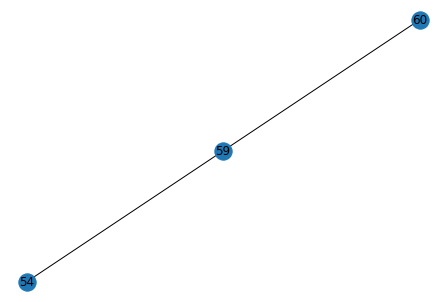

match_branches = []
edges_to_delete (resolve crossover) = [[54, 59], [54, 60], [59, 60]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([54, 59]), array([54, 60]), array([59, 60])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {36, 39, 40, 41, 44, 46, 50, 52, 55, 57, 58, 59, 61, 63, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80}
Comp 1 = {0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 42, 43, 45, 47, 48, 49, 51, 53, 54, 56, 60, 62, 64, 65, 71, 72, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92}
Comp 2 = {2}
Comp 3 = {4}
Comp 4 = {11}
curr_limb_copy.deleted_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12], array([54, 59]), array([54, 60]), array([59, 60])]
curr_limb_copy.created_edges = [[10, 12]]
After get best cut: cut_edges = [array([54, 59]), array([54, 60]), array([59, 60])], added_edges = []
total_soma_paths_to_cut = [[2, 4], [2, 10]

  Edge: [23 20]: curr_angle = 15.24
  Edge: [20 21]: curr_angle = 30.25
  Edge: [21 25]: curr_angle = 54.74
  Edge: [25 28]: curr_angle = 31.51
  Edge: [28 34]: curr_angle = 26.81
  Edge: [34 35]: curr_angle = 17.6
  Edge: [35 36]: curr_angle = 9.34

Total time for doubling_back = 0.8884584903717041

Attempting the width jump check (attempting from both sides)
  Edge: [23 20]: jump = 13.34
  Edge: [20 21]: jump = -23.31
  Edge: [21 25]: jump = -450.58
  Edge: [25 28]: jump = 27.38
  Edge: [28 34]: jump = 137.45
  Edge: [34 35]: jump = 48.97
  Edge: [35 36]: jump = 106.92
Total time for width = 1.0808124542236328
Path starting at 26 had err_edges: []
  Edge: [36 35]: jump = -106.92
  Edge: [35 34]: jump = -48.97
  Edge: [34 28]: jump = -137.45
  Edge: [28 25]: jump = -27.38
  Edge: [25 21]: jump = 425.7
Adding error edge [25 21] because width jump was 425.7000929889932
  Edge: [21 20]: jump = 174.85
  Edge: [20 23]: jump = -13.34
Total time for width = 0.9017045497894287
Path starting a

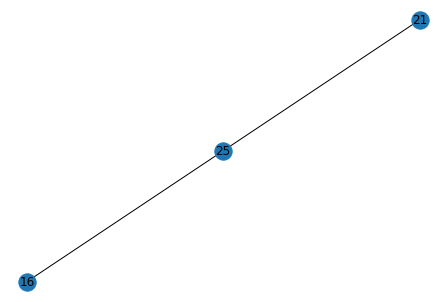

match_branches = [[16, 21]]
edges_to_delete (resolve crossover) = [[16, 25], [21, 25]]
edges_to_create (resolve crossover) = [[16, 21]]
edges_to_delete (cut_limb_network) = [array([16, 25]), array([21, 25])]
edges_to_create = [[16, 21]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27}
Comp 1 = {32, 33, 34, 35, 36, 13, 25, 28, 29, 30, 31}
curr_limb_copy.deleted_edges = [array([16, 25]), array([21, 25])]
curr_limb_copy.created_edges = [[16, 21]]
After get best cut: cut_edges = [array([16, 25]), array([21, 25])], added_edges = [[16, 21]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 

  Edge: [0 2]: curr_angle = 67.33

Total time for doubling_back = 0.22577619552612305

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -45.42
Total time for width = 0.1779952049255371
Path starting at 0 had err_edges: []
  Edge: [2 0]: jump = 45.42
Total time for width = 0.18106865882873535
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135526114907 = 294.5018186569214 ------


----- Working on Neuron 864691135589917707-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0]


 -------- Wor

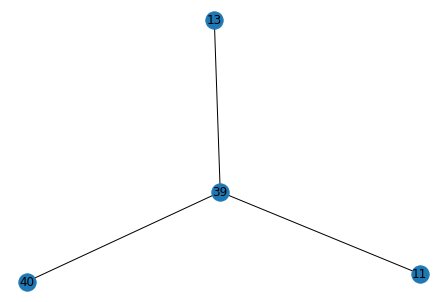

match_branches = [[11, 40], [13, 39]]
edges_to_delete (resolve crossover) = [[11, 13], [11, 39], [13, 40], [39, 40]]
edges_to_create (resolve crossover) = [[11, 40], [13, 39]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 85 because skeletal distance was 1572.189613495458 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[11, 13], [11, 39], [13, 40], [39, 40]]
edges_to_create = [[11, 40], [13, 39]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 6, 7, 9, 10, 11, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 29, 32, 34, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 1

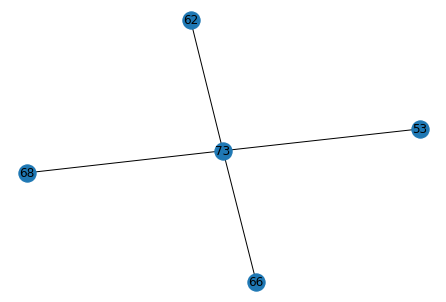

match_branches = [[53, 73], [66, 68]]
edges_to_delete (resolve crossover) = [[53, 62], [53, 66], [53, 68], [62, 66], [62, 68], [62, 73], [66, 73], [68, 73]]
edges_to_create (resolve crossover) = [[53, 73], [66, 68]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 39], [13, 40], [39, 40]]
Skipping endnode 85 because skeletal distance was 1572.189613495458 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[53, 62], [53, 66], [53, 68], [62, 66], [62, 68], [62, 73], [66, 73], [68, 73]]
edges_to_create = [[53, 73], [66, 68]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 6, 7, 9, 10, 11, 14, 15, 16, 17, 19, 20, 22, 23, 25, 27, 28, 29, 32, 34, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 106, 107, 109, 110, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126

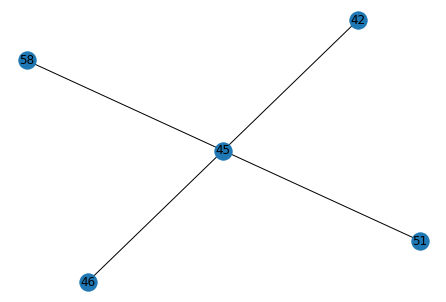

match_branches = [[45, 51], [46, 58]]
edges_to_delete (resolve crossover) = [[42, 45], [42, 46], [42, 51], [42, 58], [45, 46], [45, 58], [46, 51], [51, 58]]
edges_to_create (resolve crossover) = [[45, 51], [46, 58]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 39], [13, 40], [39, 40], [53, 62], [53, 66], [53, 68], [62, 66], [62, 68], [62, 73], [66, 73], [68, 73]]
Skipping endnode 85 because skeletal distance was 1572.189613495458 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[42, 45], [42, 46], [42, 51], [42, 58], [45, 46], [45, 58], [46, 51], [51, 58]]
edges_to_create = [[45, 51], [46, 58]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 6, 7, 9, 10, 11, 14, 16, 17, 19, 20, 22, 23, 27, 28, 29, 32, 34, 37, 38, 40, 41, 43, 44, 45, 46, 48, 49, 51, 53, 54, 55, 56, 57, 58, 60, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 106, 107, 109, 110, 113

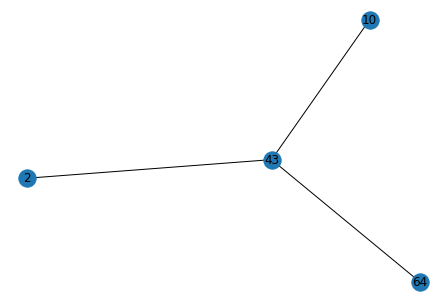

match_branches = [[2, 64], [10, 43]]
edges_to_delete (resolve crossover) = [[2, 10], [2, 43], [10, 64], [43, 64]]
edges_to_create (resolve crossover) = [[2, 64], [10, 43]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 39], [13, 40], [39, 40], [53, 62], [53, 66], [53, 68], [62, 66], [62, 68], [62, 73], [66, 73], [68, 73], [42, 45], [42, 46], [42, 51], [42, 58], [45, 46], [45, 58], [46, 51], [51, 58]]
Skipping endnode 85 because skeletal distance was 1572.189613495458 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[2, 10], [2, 43], [10, 64], [43, 64]]
edges_to_create = [[2, 64], [10, 43]]
Number of connected components = 9
Comp 0 = {0, 129, 130, 128, 131, 133, 6, 7, 136, 10, 138, 140, 141, 14, 142, 16, 145, 17, 19, 23, 154, 155, 28, 156, 159, 34, 37, 41, 43, 46, 48, 49, 54, 55, 57, 58, 60, 65, 66, 68, 76, 86, 88, 89, 97, 104, 107, 113, 114, 115, 116, 117, 121, 124, 126, 127}
Comp 1 = {25, 42, 15}
Comp 2 = {1, 2, 134, 135, 137, 9, 11, 139, 144, 146, 147, 20, 1

  Edge: [ 87 100]: curr_angle = 57.61
  Edge: [100  99]: curr_angle = 111.08

Total time for doubling_back = 0.07498598098754883
There were 1 edges that passed doubling back threshold of 100
Winning edge [100  99] had a doubling back of 111.08138959550828
***inside resolve crossover!!!!****
coordinate_branches = [94, 99, 100]
94 = red
99 = aqua
100 = purple
Angle between 94 and 99 = 117.54 
Angle between 94 and 100 = 44.63 
Angle between 99 and 100 = 106.63 
Final Matches = []
matched_branches_revised = []
Original graph


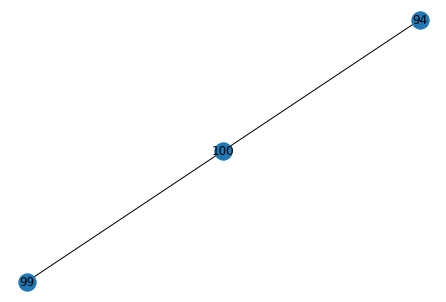

match_branches = []
edges_to_delete (resolve crossover) = [[94, 99], [94, 100], [99, 100]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([94, 99]), array([ 94, 100]), array([ 99, 100])]
edges_to_create = []
Number of connected components = 11
Comp 0 = {0, 129, 130, 128, 131, 133, 6, 7, 136, 10, 138, 140, 141, 14, 142, 16, 145, 17, 19, 23, 154, 155, 28, 156, 159, 34, 37, 41, 43, 46, 48, 49, 54, 55, 57, 58, 60, 65, 66, 68, 76, 86, 88, 89, 97, 104, 107, 113, 114, 115, 116, 117, 121, 124, 126, 127}
Comp 1 = {25, 42, 15}
Comp 2 = {64, 1, 2, 100, 38, 73, 74, 45, 51, 83, 53, 85, 22, 149, 150, 90, 87, 157, 29, 158}
Comp 3 = {98, 132, 70, 103, 105, 108, 111, 112, 143, 148, 21, 119, 92, 62}
Comp 4 = {134, 135, 137, 9, 11, 139, 144, 146, 147, 20, 151, 152, 27, 32, 40, 44, 56, 67, 69, 71, 72, 75, 77, 78, 79, 80, 81, 82, 84, 91, 93, 94, 95, 96, 101, 102, 106, 109, 110, 118, 120, 122, 123, 125}
Comp 5 = {99}
Comp 6 = {33, 35, 36, 5, 3, 39, 8, 4, 12, 13, 50, 18,

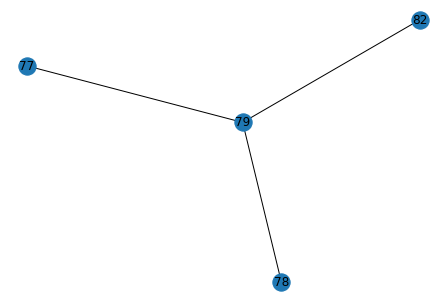

match_branches = [[79, 82], [77, 78]]
edges_to_delete (resolve crossover) = [[77, 79], [77, 82], [78, 79], [78, 82]]
edges_to_create (resolve crossover) = [[79, 82], [77, 78]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 39], [13, 40], [39, 40], [53, 62], [53, 66], [53, 68], [62, 66], [62, 68], [62, 73], [66, 73], [68, 73], [42, 45], [42, 46], [42, 51], [42, 58], [45, 46], [45, 58], [46, 51], [51, 58], [2, 10], [2, 43], [10, 64], [43, 64], array([94, 99]), array([ 94, 100]), array([ 99, 100])]
Skipping endnode 139 because skeletal distance was 846.9849289307605 and threshold was 2500
skip_nodes = [139]
edges_to_delete (cut_limb_network) = [[77, 79], [77, 82], [78, 79], [78, 82]]
edges_to_create = [[79, 82], [77, 78]]
Number of connected components = 13
Comp 0 = {0, 129, 130, 128, 131, 133, 6, 7, 136, 10, 138, 140, 141, 14, 142, 16, 145, 17, 19, 23, 154, 155, 28, 156, 159, 34, 37, 41, 43, 46, 48, 49, 54, 55, 57, 58, 60, 65, 66, 68, 76, 86, 88, 89, 97, 104, 107, 113, 114, 115, 116, 117, 12

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")